# Problema de alocação de horários em instituições de ensino

Um dos maiores desafios para gestores de instituições de ensino é a alocação de horários para os professores, disciplinas e turmas.

Por se tratar de uma tarefa que exige um elevado tempo para sua elaboração, e, se tratando de várias combinações, incluindo restrições e preferências, é bem possível que contenha vários erros, e seja necessária algumas mudanças durante o período letivo, tornando-a uma atividade essencial para o bom funcionamento das instituições.

Elaboramos este trabalho com o intuito de otimizar os resultados desta etapa da gestão das instituições, garantido que atenda a todos os requisitos de caráter obrigatório, e maximizando as preeferências exigidas pelos docentes.

## As restrições obrigatórias são:

● não é permitida a alocação de duas aulas para um mesmo professor no mesmo horário;  
● não pode haver duas aulas para uma mesma turma no mesmo horário;  
● todas as aulas devem ser alocadas ao longo dos dias de funcionamento da escola e turnos de aula pré-determinados;  
● professores não devem ser alocados em horários nos quais eles não podem estar presentes.


Existem algumas características que, quando são atendidas, minimizam os custos da instituição. Um exemplo é máximo de aulas possíveis durante o dia, para minimizar o custo de energia elétrica.
São elas:

● uma mesma turma não deverá ter três ou mais aulas geminadas da mesma disciplina, em horários sequenciais;  
● não deverá haver horários de aula separados por grandes janelas entre aulas, para uma mesma turma. Exemplo: suponha que         durante um dia, os alunos tivessem 5 horários de aulas. Então, considere que no 1° e 2° horários houvesse aula, depois no 3°   horário houvesse uma janela, e nos 4° e 5° horários os alunos voltassem a ter aulas. Logo, a solução sofreria uma penalidade.   O ideal seria ter 4 aulas sequenciais, e o 5° horário livre.   
● deve-se buscar atender às preferências de cada professor em relação a dias ou horários em que possa lecionar.

Existem também algumas restrições de professores, por exemplo, "o professor João não pode dar aula às 09:00 (nove horas) na segunda-feira". Restrições com o mesmo estilo, porém relacionadas às turmas, também são existentes, exemplo, "A turma 3º ano B não pode ter aula às 15:00 de quarta-feira".

Além de todas essas restrições mencionadas, há ainda a questão de preferências solicitadas pelos professores, como por exemplo, "o professor José tem preferência pelo horário de 10:00 da terça-feira".

O objetivo deste trabalho seria obedecer todas as restrições, e atender o máximo possível de preferências exigidas pelos professores.

## Modelagem do Problema:

Representaremos este problema através de um grafo, onde cada vértice será composto por uma tupla principal, com os rótulos "professor", "turma" e "materia", terá também outros atributos para auxiliar a execução dos algorítmos propostos.

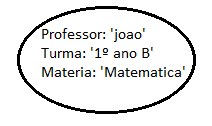

Para a inserção das arestas, ligaremos um vértice ao outro, quando tiverem igualdade de professor ou turma, para que o algorítmo de coloração que será proposto, não pinte com a mesma cor dois vértices com o mesmo professor ou turma. 

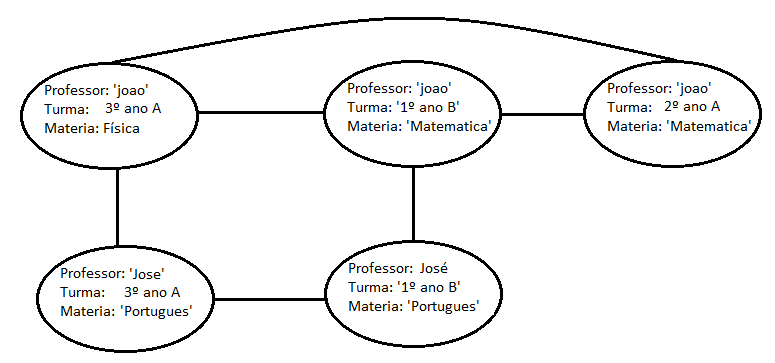

Como possui professor que leciona mais de uma aula em alguma turma, teremos alguns vértices iguais, pois cada vértice é referente à uma aula específica, por isso, é necessário um outro rótulo, para diferenciar um vértice do outro.

## Leitura dos dados

Todos os dados do problema serão através de uma planilha no formato .xlsx.
Cada arquivo é composto por 5 planilhas, sendo: Dados, Configuracoes, Restricao, Restricoes Turma, Preferencias.

A planilha de dados possui todos os dados da instituição, como materias, professores, turmas, quantidade de aulas, seguindo o padrão:

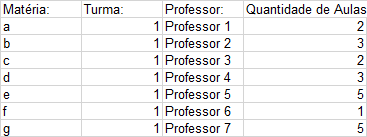

A planilha "Configuracoes" terá os horários de um dia de aula:

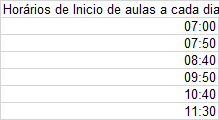

"Restricao" é referente às restrições de professores:

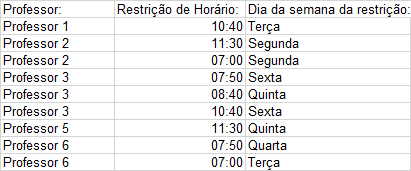

"Restricoes Turma" é semelhante à anterior, porém, indicando as restricoes da turma:

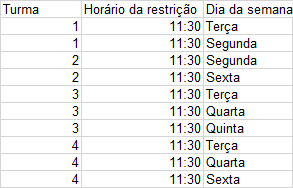

Por fim, em "Preferencias" está indicando as preferências pedidas pelos professores:

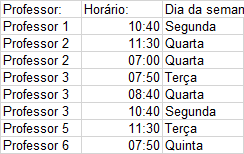

Todos os arquivos de entrada deverão seguir este padrão.

# Execução do trabalho

Foi utilizado a linguagem de programação Python versão 3.7, para implementar o código referente à solução do problema proposto.

Inicialmente iremos importar as bibliotecasnecessárias:

In [21]:
# Bilioteca para manipulação de grafos.
import networkx as nx
# Biblioteca para leitura de arquivo excel.
from xlrd import open_workbook, cellname
# Biblioteca para escrita em arquivo excel.
import xlwt
# Biblioteca para medir tempo de execução.
import time
# Função para arredondamento para baixo.
from math import floor

__author__ = "PEDRO HENRIQUE DE MENEZES" \
             "THOMAZ FLANKLIN DE SOUZA JORGE"

__date__ = "$15/11/2019 12:11:52$"


# encode UTF-8

## Leitura do arquivo:

Função para ler arquivo do formato excel .xlsx, que será passado por parâmetro.

In [22]:
def ler_arquivo(nomeDoArquivo):
    """
    Metodo que faz a abertura do arquivo que ira conter todos os dados

    :param nomeDoArquivo:
    :return: planilha excel
    """
    return open_workbook(nomeDoArquivo)

## Classe Vertice:

Para a modelagem dos vertices, foi criada uma classe da seguinte forma:

In [23]:
class Vertice():
    """
    Classe vertice

    Cada vértice do grafo seguirá este modelo, possuindo construtor default, com os valores sendo modificados após sua
    instanciacao
    """

    def __init__(self):
        self.nome = 0
        self.professor = None
        self.turma = None
        self.materia = None
        self.cor = (None,0)
        self.fake = False
        self.grau = 0

## Criando o grafo:

Realiza-se a leitura do arquivo e cria o grafo do problema:

In [24]:
def leitura_grafo_principal(aba, G: nx.Graph):
    """
    Realiza a leitura da planilha e cria um vertice novo para ser inserido no grafo.

    :param aba: variável com os dados a ser lidos (planilha Dados).
    :param G: grafo inicial vazio.
    """

    '''
    Laço para ler todas as linhas da planilha, exceto a primeira, que são os títulos.
    Aba.nrows retorna o numero de linhas não vazias da planilha
    '''
    for row_index in range(1, aba.nrows):
        ''' 
        Cria um vertice pra cada aula, se existir duas aulas na mesma linha, cria dois vertices distintos.
        Aba.cell acessa a célula referente a linha atual (row_index) e coluna 3, onde está o numero de aulas.
        '''
        for qtd_aula in range(int(aba.cell(row_index, 3).value)):
            # Instancia de novo vertice.
            vert = Vertice()
            # Alterando os valores do vertice, de acordo com a linha atual
            vert.professor = aba.cell(row_index, 2).value
            vert.turma = aba.cell(row_index, 1).value
            vert.materia = aba.cell(row_index, 0).value
            vert.nome = G.number_of_nodes() + 1

            # Inserindo o vertice no grafo.
            inserir_vertice(vert, G)
    # Inserindo as arestas.
    inserir_arestas(G)

Método para inserir os vértices:

In [25]:
def inserir_vertice(vert, grafo):
    """
    Recebe um vertice e insere no grafo
    
    :param vert: vertice
    :param grafo: grafo de destino
    """
    grafo.add_node(vert)

Método para inserir as arestas, de acordo com a modelagem do problema:
Se dois vértices (aulas) distintos possuir o mesmo professor ou truma, cria-se aresta entre eles

In [26]:
def inserir_arestas(grafo):
    """
    Insere arestas no grafo se tiverem atributos em comum
    
    :param grafo: grafo para realizar as ligações de arestas
    """
    
    # Percorre todos os vértices do grafo.
    for u in grafo:
        # Para cada vertice, percorre novamente todos os vertices.
        for v in grafo:
            '''
            Ao encontrar um vertice com os mesmos atributos de professor ou turma, é adicionada uma
            aresta entre eles, fazendo a união de todos os vertices relacionados por professor ou turma.
            '''
            if u.professor == v.professor or u.turma == v.turma:
                # Verifica se não irá duplicar a aresta.
                if not grafo.has_edge(u, v) and u != v:
                    grafo.add_edge(u, v)
                    # Incremento do grau de adjacencia de cada vertice ligado.
                    u.grau += 1
                    v.grau += 1

Note que nunca é criado um loop (um vértice ligado com ele mesmo) e nem duas arestas ligando os mesmos vértices

## Leitura dos horários

Para obter os horários, que serão tratado como cores, primeiramente é realizado a leitura da planilha Configuracoes, do arquivo excel, cada horário é referente ao início de cada aula em um dia da semana.

Método para retornar o número de horários de início das aulas de um dia:

In [27]:
def obter_horas(aba):
    """
    Leitura dos horários da planilha
    :param aba: planilha com os horarios referentes ao inicio das aulas
    :return: quantidade de horários (linhas da planilha) vezes 5 dias da semana
    """
    return (aba.nrows - 1) * 5

In [28]:
def horarios(aba, dias):
    """
    Leitura do arquivo onde se encontra os horarios
    :param aba: variavel onde se encontra a planilha
    :param dias: dicionario com os dias da semana
    """
    
    # Percorre todas as linhas do arquivo e adiciona os horarios para todos os dias
    for row_index in range(1, aba.nrows):
        dias['Segunda'].append(aba.cell(row_index, 0).value)
        dias['Terça'].append(aba.cell(row_index, 0).value)
        dias['Quarta'].append(aba.cell(row_index, 0).value)
        dias['Quinta'].append(aba.cell(row_index, 0).value)
        dias['Sexta'].append(aba.cell(row_index, 0).value)

São lidos os horários da planilha, e adicionados em todos os dias da semana.

## Leitura das restrições

Como mencionado no início, existem restrições que devem ser seguidas.
Para atender a essas restrições, foi criado um método que lê as restrições, e pra cada uma é criado um novo vértice, já com uma cor referente ao horário da restrição, o professor ou turma, e adicionado um novo rótulo ao vertice, com o nome de fake, que irá marcar se o vértice é uma aula, caso seu valor seja False, ou uma restrição caso True.

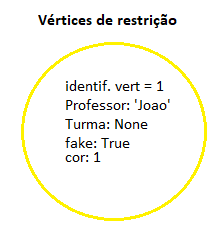

Deste modo, ao inserir as arestas para este vértice, a ligação é feita como anteriormente, porém só existe o professor ou turma

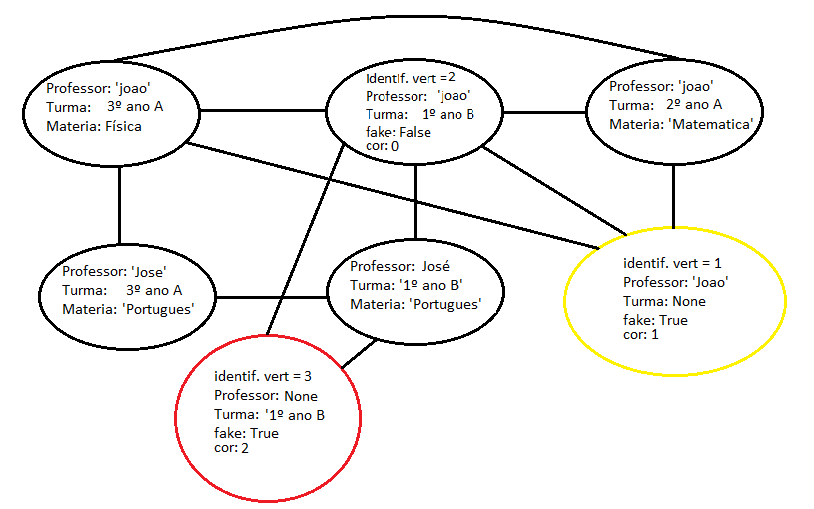

Lembrando que todos os vértices possui os mesmos atributos, o que diferencia uma restrição de uma turma, é somente o marcador fake.

A leitura das restrições é feita através do seguinte método:
Será criado vértices falsos de restrição de professor e restrição de turmas, utilizando o mesmo código, porém existe uma verificação do tipo da restrição

In [29]:
def ler_restricoes(aba, grafo):
    """
    Leitura das restrições e criando vertices fake para obedece-las
    :param aba: planilha com os dados das restrições
    :param grafo: grafo ja inicializado com os vertices não fake
    """
    
    # Para toda linha da planilha recebida, a partir da segunda
    for row_index in range(1, aba.nrows):
        # Cria um novo vertice
        vert = Vertice()
        
        # escolhendo o tipo de restrição (professor ou turma)
        if aba.cell(0, 0).value == 'Professor:':
            vert.professor = aba.cell(row_index, 0).value
        
        elif aba.cell(0, 0).value == 'Turma':
            vert.turma = aba.cell(row_index, 0).value
        
        # Inserindo os valores no vértice.
        vert.nome = grafo.number_of_nodes() + 1
        # Marcando o vértice como fake, para não ser possível alterar
        vert.fake = True
        hora = aba.cell(row_index, 1).value
        dia = aba.cell(row_index, 2).value
        # Encontrando a cor do vertice de acordo com o horário e setando a cor do vértice
        cor = (dia, hora)
        vert.cor = cor
        # Inserir vértice
        inserir_vertice(vert, grafo)
    # Inserir as arestas referentes
    inserir_arestas(grafo)

Agora já temos o grafo completamente modelado, de acordo com o problema de alocação de horários.
Com esta modelagem iremos garantir que todas as restrições serão atendidas

## Leitura das preferências

O seguinte método faz a leitura das preferências dos professores:

Como as preferências não são de caráter obrigatório, primeiro contamos quantas são atendidas, e tentamos alterar alguma cor para atender outras:

In [30]:
def ler_preferencias(aba, listaAdj):
    """
    Le as preferencias dos professores e retorna quantas foram atendidas

    :param aba: planilha com as preferencias
    :param listaAdj: Lista de adjacencia do grafo
    """

    # Para todas linhas da planilha
    for row_index in range(1, aba.nrows):
        # Encontre o professor, o dia e a hora
        prof = aba.cell(row_index, 0).value
        dia = aba.cell(row_index, 2).value
        hora = aba.cell(row_index, 1).value

        # Encontra a cor referente
        cor = (dia, hora)
        # Procura dentre todas as aulas do professor se alguma encaixa na preferência
        for i in listaAdj:
            if i.professor == prof:
                # Se já é atendida a preferencia, incrementa o contador
                if i.cor == cor:
                    break
                else:
                    # Se não, verifica se pode alterar a cor para a preferida do professor
                    existe = False
                    for j in listaAdj[i]:
                        if j.cor == cor:
                            existe = True
                            break
                    if not existe and not i.fake:
                        i.cor = cor

    cont = 0
    for row_index in range(1, aba.nrows):
        # Encontre o professor, o dia e a hora
        prof = aba.cell(row_index, 0).value
        dia = aba.cell(row_index, 2).value
        hora = aba.cell(row_index, 1).value

        # Encontra a cor referente
        cor = (dia, hora)
        # Procura dentre todas as aulas do professor se alguma encaixa na preferência
        for i in listaAdj:
            if i.professor == prof:
                # Se já é atendida a preferencia, incrementa o contador
                if i.cor == cor:
                    cont += 1
                    break

    return cont

## Resolvendo o problema:

Para resolver este problema, iremos utilizar a técnica de coloração de vértices de um grafo.
Dando uma atribuição de rótulos tradicionalmente chamados "cores" a elementos de um grafo sujeita a certas restrições. Em sua forma mais simples, é uma forma de colorir os vértices de um grafo tal que não haja dois vértices adjacentes que compartilhem a mesma cor. Exemplo: Se um vértice de um grafo possui a cor 1, nenhum de seus vizinhos pode possuir a mesma cor.

Coloração aplicada ao grafo de "Petersen":

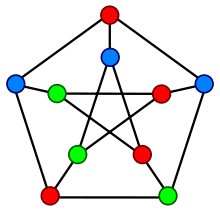

## Coloração de vértices
Seja G(V, E) um grafo, onde V é o conjunto de vértices e E o conjunto de arestas. Uma coloração para o grafo G é uma atribuição de cores para cada vértice de forma que vértices adjacentes tenham diferentes cores. De modo formal uma coloração consiste em função c:V(G) -> N tal que c(u) ≠ c(v), se u e v são vértices adjacentes.

Embora as cores usadas na representação do problema possam ser elementos de qualquer conjunto, cores reais (tais como verde, vermelho, azul e amarelo) somente são utilizadas quando um pequeno número de cores está sendo considerado. Em muitas situações inteiros positivos (1,2, ... , ݇k) são empregados para representar as cores.

O grafo G é k-colorível se podemos atribuir uma das k cores para colorir G.

O número cromático χ(G) de um grafo G é o menor número de cores necessárias para colorir G.

Não existe nenhum algoritmo eficiente que seja capaz de encontrar o número cromático ótimo de um grafo. 

Uma vez que o problema da determinação do número cromático é classificado como NP-completo, qualquer algoritmo exato empregado em sua resolução terá complexidade exponencial, desta maneira, torna-se importante a utilização de técnicas heurísticas para solução aproximada desse problema em tempo polinomial.

Utilizaremos o algoritmo heurístico de coloração por classe.

## Algorítmo de coloração por classes:

O algoritmo utiliza os horários da semana separados po tuplas, referente ao dia e horário de início de cada aula, e atribui cada horario a uma variável cor, em seguida, percorre todos os vértice que estão sem cor que estão armazenados no vetor vértices. Para cada vértice pertencente ao conjunto de vértices não coloridos, é verificada em sua lista de adjacência se algum vizinho possui a cor atual. Caso algum vizinho possua tal cor, passamos para o próximo vértice, caso não tenha conflito com os vizinhos, atribuí-se a cor atual para o vértice, que é removido da lista de vértices não coloridos.

Temos para cada iteração dos laços referente aos horários, um conjunto independente, que não possui nenhum vértice adjacente a outro do mesmo conjunto, garantindo que não existirá conflitos de horários.

Realizando desta forma uma coloração por conjuntos independentes.

In [31]:
def Cor_classe(vertices, listaAdj, dias):
    """
    Método de coloração por classe de cor, onde cada conjunto independente receberá uma cor diferente
    
    :param vertices: Lista com todos os vértices do grafo
    :param listaAdj: Lista de adjacencia do grafo
    :param dias: Horários.
    """
    
    # Percorre todos os horários da semana.
    for dia in dias:
        for hora in dias[dia]:
            # Atribui uma tupla de dia e hora para a cor
            cor = (dia, hora)
            # Para todo vertice do vetor
            for vert in vertices:
                # Variável para marcar se uma cor existe na lista de adjacencia do vertice que irá ser colorido
                existe = False
                # Para todo vertice vizinho ao vértice a ser colorido
                for i in listaAdj[vert]:
                    # Se existe algum vizinho que possua a cor atual, para a repetição e marca que existe a cor
                    if i.cor == cor:
                        existe = True
                        break
                # Se não existe nenhum vizinho com a cor atual, essa cor é atribuída ao vértice a ser colorido
                # O vértice já colorido é removido do vetor vertices
                if not existe:
                    vert.cor = cor
                    vertices.remove(vert)            

Como toda heurística de coloração de grafos, o resultado obtido é um resultado válido, porém não é o melhor resultado. A prova disso é a quantidade de vértices não coloridos.

## Algorítmo de busca local para reduzir o número de cores

Como ainda não temos um resultado satisfatório, criamos um método melhorar, que utiliza uma b-estratégia para tentar diminuir o número de cores de um grafo, no nosso caso, diminuir a quantidade de vértices não coloridos:

In [32]:
def melhorar(listaAdj, cores, qtdIni, qtdAtual):
    """
    Função b-strategy para tentar melhorar numero de cores
    :param listaAdj: Lista de adjacencia do grafo
    :param cores: Vetor com a lista de cores (horários)
    :param qtdIni: Quantidade de horários da semana
    :param qtdAtual: Quantidade atual de cores
    """

    # Método interno para verificar se existe alguma cor que possa ser trocada
    def procuraCor(vert):
        """
        Recebe um vértice e retorna uma cor
        :param vert: Vértice para tentar alterar a cor
        :return: Cor para alteração da cor do vértice
        """
        # para todas as cores existentes
        for c in cores:
            # Se a cor for diferente da cor do vertice
            # Verifica nos seus adjacentes se algum possui a cor
            if c != vert.cor:
                # Marcador se existe cor em algum vértice
                ret = True
                for i in listaAdj[vert]:
                    if i.cor == c:
                        ret = False
                # retorna cor, se for possível trocar a cor do vertice
                if ret:
                    return c
        # caso não seja possível trocar a cor, retorna a própria cor do vertice
        return vert.cor

    # Enquanto a quantidade atual de cores for maior que a quantidade de horários
    # Após encontrar uma quantidade igual, tenta mais qtdIni vezes
    a = 0
    while qtdAtual > qtdIni and a < qtdIni:
        #se já chegou em um resultado satisfatório, tenta-se reduzir mais algumas vezes
        if qtdAtual <= qtdIni:
            a += 1
        # para todas as cores do vetor cores
        for c in cores:
            # Para todos os vertices do grafo
            for i in listaAdj:
                # Se a cor for igual a cor do vertice, e o vertice não for fake
                # Chama a função procuraCor para alterar a cor do vertice
                if i.cor == c and not i.fake:
                    i.cor = procuraCor(i)
            # Verificação de cores dos vertices
            # Se existe alguma cor do vetor que não está atribuída a nenhum vértice, essa cor é removida
            exclui = True
            for j in listaAdj:
                if j.cor == c:
                    exclui = False
            if exclui:
                cores.remove(c)
                qtdAtual = len(cores)

O algorítmo recebe a lista de adjacência do grafo, um vetor com todas as cores atribuídas aos vértices, a quantidade de horários da semana e a quantidade de cores já atribuídas.
Após chegar na mesma quantidade, o algorítmo é executado mais uma quantidade de vezes, com o intuito de reduzir ainda mais a quantidade de cores.
Para cada cor, testamos todos os vértices desta mesma cor, se é possível alterar a cor. Após verificar todos os vértices pertencentes a uma classe de cor, então verifica se essa cor pode ser removida do vetor de cores.
Finalizando a busca local, é mostrado quantos vértices ainda não possuem cor.

Também foi criada uma outra função que funciona de forma semelhante, para tentar reduzir o número de vértices não coloridos:

In [33]:
def completa(listaAdj, dias):
    # Vetor para armazenar os vértices não coloridos
    vertNaoCol = []
    
    # Contador começando em n até 0 
    contador = len(listaAdj)
    
    # Para todos os vértice sem cor, adicionamos no vetor
    for v in listaAdj:
        if v.cor == (None, 0):
            vertNaoCol.append(v)
    
    # Enquanto existir vértices sem cor e o contador for maior que 0
    while vertNaoCol and contador > 0:
        # Reseta o vetor
        vertNaoCol.clear()
        # Repete-se a função de preencher o vetor
        for v in listaAdj:
            if v.cor == (None, 0):
                vertNaoCol.append(v)
        # Para cada horário, verifíca-se todos os vértices
        for dia in dias:
            for hora in dias[dia]:
                cor = (dia, hora)
                for v in vertNaoCol:
                    # Verifica a possibilidade de atribuir alguma cor ao vértice
                    pinta = True
                    for i in listaAdj[v]:
                        if i.cor == cor:
                            pinta = False
                            break
                    # Se o vértice for colorido, então ele é removido do vetor
                    if pinta:
                        v.cor = cor
                        vertNaoCol.remove(v)
        # Caso o resultado não seja satisfatório, tenta alterar a cor de outros vértices e subtrai 1 do contador
        if len(vertNaoCol) > 0:
            muda_cor(listaAdj, dias)
            contador -= 1

In [34]:
def muda_cor(listaAdj, dias):
    """
    Função para mudar cor dos vértices
    :param listaAdj: Lista de adjacencia do grafo
    :param dias: horas
    """
    
    # Função para encontrar alguma cor válida para o vértice
    def procuraCor(vert, cores):
        """
        Recebe um vértice e retorna uma cor
        :param vert: vértice para ser alterado
        :return: Cor para alteração da cor do vértice
        """
        # para todas as cores existentes
        for c in cores:
            # Se a cor for diferente da cor do vertice
            # Verifica nos seus adjacentes se algum possui a cor
            if c != vert.cor:
                # Marcador se existe cor em algum vértice
                ret = True
                for i in listaAdj[vert]:
                    if i.cor == c:
                        ret = False
                # retorna cor, se for possível trocar a cor do vertice
                if ret:
                    return c
        # caso não seja possível trocar a cor, retorna a própria cor do vertice
        return vert.cor

    # Criado um vetor para armazenar as cores existentes
    cores = []
    for d in dias:
        for h in dias[d]:
            cores.append((d,h))
    # para toda cor, testa todos os vértices
    for c in cores:
        # Para todos os vertices do grafo
        for i in listaAdj:
            # Se a cor for igual a cor do vertice, e o vertice não for fake
            # Chama a função procuraCor para alterar a cor do vertice
            if i.cor == c and not i.fake:
                i.cor = procuraCor(i, cores)
        # Verificação de cores dos vertices
        # Se existe alguma cor do vetor que não está atribuída a nenhum vértice, essa cor é removida


Toda a execução do programa é feita através de um método principal

Inicia recebendo o nome do arquivo por parâmetro, em seguida cria uma string que será incrementada conforme os resultados, e será usada de retorno do programa. Cria-se um grafo vazio e abre o arquivo referente à escola.

Após ler os dados da planilha, é feita a modelagem do grafo, conforme descrito anteriormente, em seguida são lidas as restrições de caráter obrigatório.

Em seguida, todos os vértices que não são restrições de aula, são referenciados através de um vetor. Após isso, é executado o algorítmo de coloração, melhora e tenta minimizar a quantidade de vértices não coloridos, e por fim, é verificada as preferências dos professores, e retorna os resultados.

In [35]:
def principal(escola: str):
    """
    Possui o corpo do programa.

    :param escola:
    :return: string com dados da resolução
    """

    # String para retornar.
    retorno = escola + ':'

    # Print para acompanhar programa
    print('Executando ',escola)

    # Adicionando extensão no nome do arquivo
    escola += '.xlsx'
    # Instancia de Grafo da biblioteca networkx.
    grafo = nx.Graph()

    # Marcando tempo de inicio de execução.
    ini = time.time()

    # Abrir arquivo.
    plan = ler_arquivo(escola)

    # Salvando as planilhas em variaveis.
    aba = plan.sheet_by_name('Dados')
    abaConfig = plan.sheet_by_name('Configuracoes')
    abaRestr = plan.sheet_by_name('Restricao')
    abaRestrTurma = plan.sheet_by_name('Restricoes Turma')
    abaPref = plan.sheet_by_name('Preferencias')

    # Lendo os dados das planilhas e criando o grafo
    leitura_grafo_principal(aba, grafo)
    listaAdj = nx.to_dict_of_lists(grafo)


    # Vetores de vertices e cores.
    vertices = []
    cores = []

    """
       Dicionário para criar os horários de cada dia da semana
       as chaves serão o nome do dia, e os horarios serão adicionados em um vetor para cada dia
       """
    dias = {'Segunda': [], 'Terça': [], 'Quarta': [], 'Quinta': [], 'Sexta': []}

    # Lendo os horários da planilha
    horarios(abaConfig, dias)

    # Lendo as restrições de professores e turma, passando a planilha de restrições, vetor dias e o grafo.
    ler_restricoes(abaRestr, grafo)
    ler_restricoes(abaRestrTurma, grafo)

    # Criando a lista de adjacencia referente ao grafo
    listaAdj = nx.to_dict_of_lists(grafo)

    # Obtém a quantidade de horarios da semana, enviando a aba de configuracoes
    qtdHora = obter_horas(abaConfig)

    # Adicionando todos os vértices não fake no vetor vertices
    for i in listaAdj:
        if not i.fake:
            vertices.append(i)

    # Marcar início do tempo do algoritmo
    ini1 = time.time()

    # Método de coloração por classes
    Cor_classe(vertices, listaAdj, dias)

    # Resetando o vetor cores
    cores.clear()
    # Preenchendo o vetor com todas as cores existentes
    for vert in listaAdj:
        adiciona = True
        for i in range(len(cores)):
            if cores[i] == vert.cor:
                adiciona = False
        if adiciona and not vert.fake:
            cores.append(vert.cor)

    # Função melhorar utilizando b-strategy passando a lista de adjacencia e o vetor de horarios
    melhorar(listaAdj, cores, qtdHora, len(cores))


    # Função para tentar reduzir a quantidade de vértices não coloridos
    completa(listaAdj, dias)
    # Contadores
    vertNaoColorido = 0

    for vert in listaAdj:
        adiciona = True
        if vert.cor == (None, 0):
            vertNaoColorido +=1

    # Lendo as preferências dos professores e contando quantas são atendidas
    qtdPreferencias = ler_preferencias(abaPref, listaAdj)

    # Contando quantidades de cores, sem contar restrições
    cores.clear();
    for vert in listaAdj:
        adiciona = True
        for i in range(len(cores)):
            if cores[i] == vert.cor:
                adiciona = False
        if adiciona and not vert.fake:
            cores.append(vert.cor)


    # Retornando os resultados
    retorno += '\nQuantidade de cores: ' + str(len(cores))
    retorno += '\nVértices não coloridos: ' + str(vertNaoColorido)
    retorno += '\nPreferências atendidas sobre o total de preferências: ' + str(qtdPreferencias) + '/' + \
               str(abaPref.nrows - 1)

    # Finalizando e mostrando o tempo de execução do algoritmo
    fim1 = time.time()
    retorno +=  '\nTempo de execução do algoritmo ' + str(round(fim1 - ini1,2)) + 'segundos'

    # Salvando os arquivos
    #salvar_arquivo_excel(listaAdj, escola, dias, abaConfig)

    # Retornando a string com informações
    return retorno

## Salvando os arquivos de saída:

É gerado um arquivo de texto com os seguintes resultados:
Nome da instituição;
Quantidade de cores;
Vértices não coloridos;
Preferências atendidas;
Tempo de execução do algorítmo;

In [36]:
def salvar_arquivo_texto(texto):
    """
    Salva resultados em arquivo de texto
    :param texto: String de resultados
    """
    
    # Cria arquivo novo, copia o resultado e fecha.
    arq = open('arquivoSaida.txt', 'w')
    arq.write(texto)
    arq.close()

 Também optamos por uma arquivo de saída em excel, utilizando uma formatação agradável, pois torna o entendimento mais fácil para o usuário.
 Apesar de extenso, essa parte do código tem única finalidade de passar para um arquivo, uma solução com boa aparencia para o usuário.

In [37]:
def salvar_arquivo_excel(listaAdj, escola, dias, aba):
    """
    Método que recebe os dados e salva em formato excel
    
    :param listaAdj: Lista de adjacencia do grafo
    :param escola: Nome da instituição referente aos dados
    :param dias: vetor com os dias e horários (cores)
    :param aba:  aba de configurações de horário do arquivo original
    """

    def estilosFormatacaoCelulas():
        """
        Método que cria alguns estilos de formatação de células
        :return Vetor com os estilos de formatação
        """
        # Vetor para guardar os estilos
        styles = []

        # Definindo fontes
        fnt1 = Font()
        fnt1.name = 'Verdana'
        fnt1.bold = True
        fnt1.height = 130
        fnt1.colour_index = 10
        fnt1.italic = True

        fnt2 = Font()
        fnt2.name = 'Verdana'
        fnt2.bold = True
        fnt2.height = 150
        fnt2.colour_index = 5

        fnt3 = Font()
        fnt3.name = 'Verdana'
        fnt3.bold = True
        fnt3.italic = True
        fnt3.height = 12 * 0x14

        fnt4 = Font()
        fnt4.colour_index = 4
        fnt4.name = "Times New Roman"
        fnt4.height = 140

        # Definindo Patterns
        pat1 = Pattern()
        pat1.pattern = Pattern.SOLID_PATTERN
        pat1.pattern_fore_colour = 0

        pat2 = Pattern()
        pat2.pattern = Pattern.SOLID_PATTERN
        pat2.pattern_fore_colour = 0

        pat3 = Pattern()
        pat3.pattern = Pattern.SOLID_PATTERN
        pat3.pattern_fore_colour = 22

        pat4 = Pattern()
        pat4.pattern = Pattern.SOLID_PATTERN
        pat4.pattern_fore_colour = 16

        # Definindo bordas
        brd1 = Borders()
        brd1.left = 2
        brd1.right = 2
        brd1.top = 2
        brd1.bottom = 2

        brd2 = Borders()
        brd2.left = 7
        brd2.right = 7
        brd2.top = 7
        brd2.bottom = 7

        brd3 = Borders()
        brd3.left = 0x02
        brd3.right = 0x02
        brd3.top = 0x02
        brd3.bottom = 0x02

        # Definindo alinhamento
        al1 = Alignment()
        al1.rota = Alignment.ROTATION_STACKED
        al1.rota = Alignment.ROTATION_0_ANGLE
        al1.vert = Alignment.VERT_CENTER
        al1.horz = Alignment.HORZ_CENTER_ACROSS_SEL

        alTit = Alignment()
        alTit.rota = 90
        alTit.vert = Alignment.VERT_CENTER
        alTit.horz = Alignment.HORZ_CENTER

        al2 = Alignment()
        al2.horz = Alignment.HORZ_RIGHT
        al2.vert = Alignment.VERT_CENTER

        al3 = Alignment()
        al3.horz = Alignment.HORZ_CENTER
        al3.vert = Alignment.VERT_CENTER

        # Criando os estilos
        style1 = XFStyle()
        style1.font = fnt1
        style1.alignment = al1
        style1.pattern = pat2
        style1.borders = brd1
        styles.append(style1)

        styleTit = XFStyle()
        styleTit.font = fnt1
        styleTit.alignment = alTit
        styleTit.pattern = pat2
        styleTit.borders = brd1
        styles.append(styleTit)

        style2 = XFStyle()
        style2.font = fnt2
        style2.alignment = al1
        style2.pattern = pat2
        style2.borders = brd3
        styles.append(style2)

        style3 = XFStyle()
        style3.font = fnt3
        style3.alignment = al1
        style3.pattern = pat2
        style3.borders = brd3
        styles.append(style3)

        style4 = XFStyle()
        style4.font = fnt1
        style4.pattern = pat4
        style4.alignment = al3
        style4.borders = brd2
        styles.append(style4)

        style5 = XFStyle()
        style5.font = fnt4
        style5.pattern = pat3
        style5.alignment = al3
        style5.borders = brd2
        styles.append(style5)

        styleHora = XFStyle()
        styleHora.font = fnt2
        styleHora.alignment = al1
        styleHora.pattern = pat1
        styleHora.borders = brd3
        styleHora.num_format_str = 'HH:MM'
        styles.append(styleHora)

        return styles


    # Vetor com os estilos de formatação
    estilos = estilosFormatacaoCelulas()

    # Criando um novo book e adicionando as planilhas
    saida = xlwt.Workbook()
    plan = saida.add_sheet('saida')
    planProf = saida.add_sheet('professores', cell_overwrite_ok=True)
    planTurmas = saida.add_sheet('turmas', cell_overwrite_ok=True)
    planVertNao = saida.add_sheet('vertices nao coloridos', cell_overwrite_ok=True)

    # Planilha com todos os resultados
    # Criando cabeçalho
    plan.write(0, 0, 'TURMA', estilos[2])
    plan.write(0, 1, 'PROFESSOR', estilos[2])
    plan.write(0, 2, 'DIA', estilos[2])
    plan.write(0, 3, 'HORARIO', estilos[2])
    plan.write(0, 4, 'MATERIA', estilos[2])

    # Adicionando todos os vértices
    # Todos as aulas
    for i in listaAdj:
        t = i.cor
        plan.write(i.nome, 0, i.turma, estilos[5])
        plan.write(i.nome, 1, i.professor, estilos[5])
        plan.write(i.nome, 2, t[0], estilos[5])
        plan.write(i.nome, 3, i.cor[-1], estilos[5])
        plan.write(i.nome, 4, i.materia, estilos[5])

    # Planilha referente aos horários de cada professor
    # Definindo largura da coluna
    planProf.col(0).whidth = 40
    planProf.col(1).whidth = 80
    planProf.col(2).whidth = 80
    planProf.col(3).whidth = 80
    planProf.col(4).whidth = 80

    # Criando tabela Default ( sem valores )
    # Título da planilha
    planProf.write(0, 0, 'PLANILHA COM OS HORÁRIOS DE CADA PROFESSOR', estilos[2])
    planProf.merge(0, 0, 0, 6, estilos[3])

    # Uma tabela pra cada professor
    # Vetor com todos os professores
    prof = []
    for vert in listaAdj:
        adiciona = True
        for i in prof:
            if vert.professor == i.professor:
                adiciona = False
                break
        if adiciona and vert.professor:
            prof.append(vert)
    # Ordenando o vetor
    sorted(prof, key=str)

    # Contador (referente a cada professor)
    lTabela = 0

    # Titulos das Colunas (dias)
    for p in prof:
        planProf.write((prof.index(p) + 2) + lTabela, 0, p.professor, estilos[1])
        planProf.merge((prof.index(p) + 2) + lTabela, (prof.index(p) + aba.nrows) + lTabela, 0, 0, estilos[2])
        planProf.write((prof.index(p) + 1) + lTabela, 0, 'Professor', estilos[2])
        planProf.write((prof.index(p) + 1) + lTabela, 2, 'Segunda', estilos[2])
        planProf.write((prof.index(p) + 1) + lTabela, 3, 'Terça', estilos[2])
        planProf.write((prof.index(p) + 1) + lTabela, 4, 'Quarta', estilos[2])
        planProf.write((prof.index(p) + 1) + lTabela, 5, 'Quinta', estilos[2])
        planProf.write((prof.index(p) + 1) + lTabela, 6, 'Sexta', estilos[2])
        planProf.write((prof.index(p) + 1) + lTabela, 1, 'Horários', estilos[2])

        # Títulos das linhas (horarios)
        for row_index in range(1, aba.nrows):
            planProf.write(((prof.index(p) + 1) + lTabela + row_index), 1, aba.cell(row_index, 0).value, estilos[6])

        # Preenchendo com os valores
        for j in listaAdj:
            if j.professor == p.professor:
                lin = 2
                for d in dias:
                    col = 1
                    for h in dias[d]:
                        cor = (d, h)
                        if cor == j.cor:
                            if j.fake:
                                planProf.write(((prof.index(p) + 1) + lTabela + col), lin, 'RESTRIÇÃO', estilos[4])
                            else:
                                planProf.write(((prof.index(p) + 1) + lTabela + col), lin, j.turma, estilos[5])
                        col += 1
                    lin += 1
        lTabela += aba.nrows

    # Planilha referente aos horários de cada turma
    # Definindo largura da coluna
    planTurmas.col(0).whidth = 40
    planTurmas.col(1).whidth = 80
    planTurmas.col(2).whidth = 80
    planTurmas.col(3).whidth = 80
    planTurmas.col(4).whidth = 80

    # Criando tabela Default ( sem valores )
    # Título da planilha
    planTurmas.write(0, 0, 'PLANILHA COM OS HORÁRIOS DE CADA TURMA', estilos[2])
    planTurmas.merge(0, 0, 0, 6, estilos[3])

    # Uma tabela pra cada turma
    # Vetor com todas as turmas
    turmas = []
    for vert in listaAdj:
        adiciona = True
        for i in turmas:
            if vert.turma == i.turma:
                adiciona = False
                break
        if adiciona and vert.turma:
            turmas.append(vert)
    # Ordenando o vetor
    sorted(turmas,key=str)

    # Contador (referente a cada turma)
    lTabela = 0

    # Titulos das Colunas (dias)
    for p in turmas:
        planTurmas.write((turmas.index(p) + 2) + lTabela, 0, p.turma, estilos[1])
        planTurmas.merge((turmas.index(p) + 2) + lTabela, (turmas.index(p) + aba.nrows) + lTabela, 0, 0, estilos[2])
        planTurmas.write((turmas.index(p) + 1) + lTabela, 0, 'Turma', estilos[2])
        planTurmas.write((turmas.index(p) + 1) + lTabela, 2, 'Segunda', estilos[2])
        planTurmas.write((turmas.index(p) + 1) + lTabela, 3, 'Terça', estilos[2])
        planTurmas.write((turmas.index(p) + 1) + lTabela, 4, 'Quarta', estilos[2])
        planTurmas.write((turmas.index(p) + 1) + lTabela, 5, 'Quinta', estilos[2])
        planTurmas.write((turmas.index(p) + 1) + lTabela, 6, 'Sexta', estilos[2])
        planTurmas.write((turmas.index(p) + 1) + lTabela, 1, 'Horários', estilos[2])

        # Titulos das linhas (horarios)
        for row_index in range(1, aba.nrows):
            planTurmas.write(((turmas.index(p) + 1) + lTabela + row_index), 1, aba.cell(row_index, 0).value, estilos[6])

        # Preenchendo com os horários
        for j in listaAdj:
            if j.turma == p.turma:
                lin = 2
                for d in dias:
                    col = 1
                    for h in dias[d]:
                        cor = (d, h)
                        if cor == j.cor:
                            if j.fake:
                                planTurmas.write(((turmas.index(p) + 1) + lTabela + col), lin, 'RESTRIÇÃO', estilos[4])
                            else:
                                planTurmas.write(((turmas.index(p) + 1) + lTabela + col), lin, j.professor, estilos[5])
                        col += 1
                    lin += 1
        lTabela += aba.nrows

    # Salvando o arquivo
    saida.save('saida_' + escola + '.xls')

Para a execução do programa iniciar, é necessário que se passa o caminho onde está o arquivo.

In [ ]:
def inicio():
    texto = ''
    texto += (principal(r'C:\Users\estudo\Desktop\UFLA\2019-2\Grafos\Trabalho\NewPythonProject\Escola_A')) + '\n\n'
    texto += (principal(r'C:\Users\estudo\Desktop\UFLA\2019-2\Grafos\Trabalho\NewPythonProject\Escola_B')) + '\n\n'
    texto += (principal(r'C:\Users\estudo\Desktop\UFLA\2019-2\Grafos\Trabalho\NewPythonProject\Escola_C')) + '\n\n'
    texto += (principal(r'C:\Users\estudo\Desktop\UFLA\2019-2\Grafos\Trabalho\NewPythonProject\Escola_D')) + '\n\n'
    
    #salvar_arquivo_texto(texto)
    print(texto)
    
inicio()

Executando  C:\Users\estudo\Desktop\UFLA\2019-2\Grafos\Trabalho\NewPythonProject\Escola_A
Executando  C:\Users\estudo\Desktop\UFLA\2019-2\Grafos\Trabalho\NewPythonProject\Escola_B


# Exemplo utilizando a Escola_C 

Para mostrar toda a execução do programa, escolhemos a "Escola_C" pelo fato de ser uma instituição com menor número de aulas

Planilha com os dados das aulas:

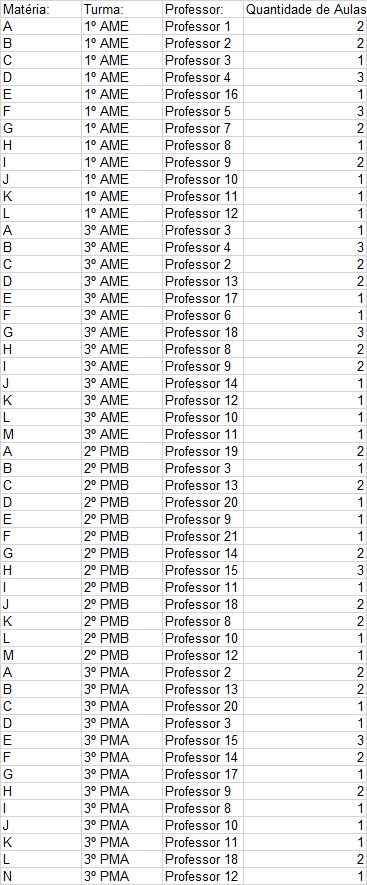

Planilha com os horários:

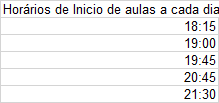

Planilha com as restrições referentes ao professor:

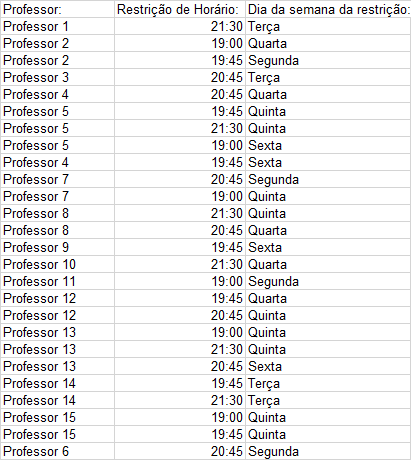

Restrições de turmas:

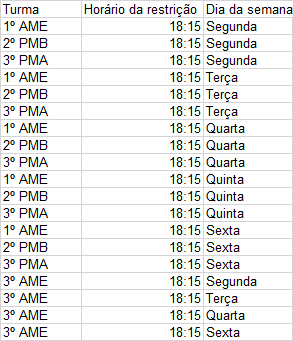

Preferências dos professores:

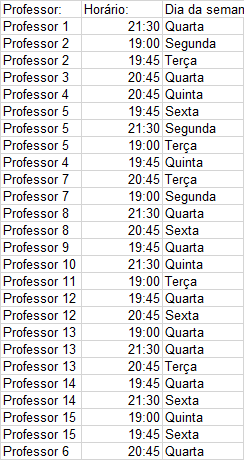

Após a execução da leitura dos dados, é criado um grafo com os vértices sendo cada aula.

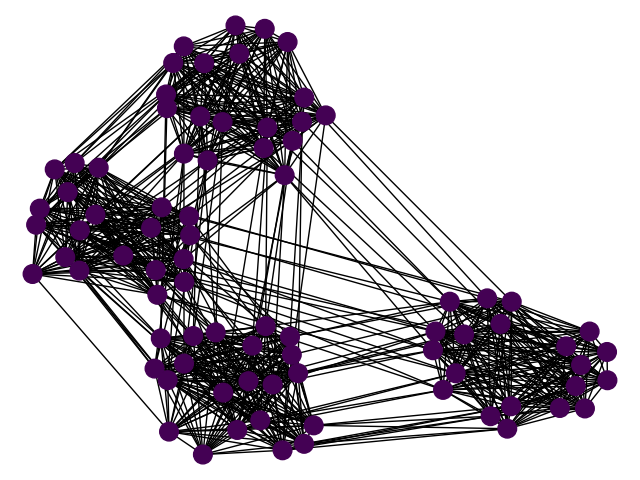

Em seguida é adicionado as restrições de professores e turmas, e o grafo é colorido de acordo com o dia e horário da restrição:

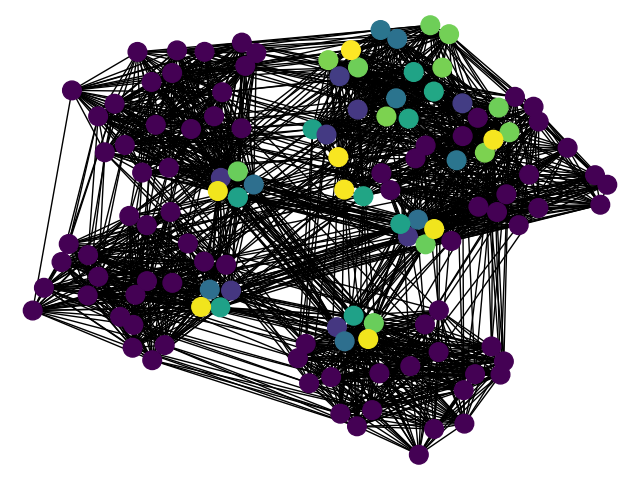

Em seguida, é realizada a primeira coloração:

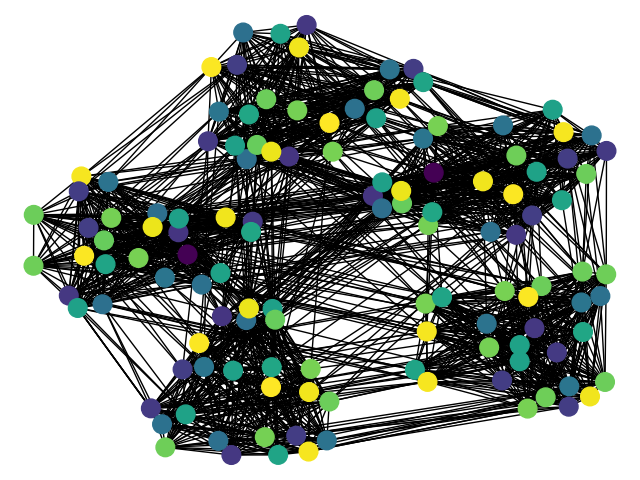

Note que ainda existem vértices com a cor inicial, pois não foram pintados ainda.

Próxima etapa é melhorar a coloração com a função melhorar:

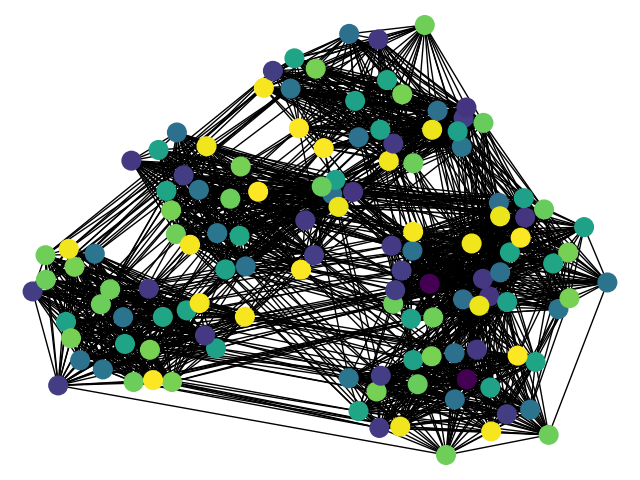

E em seguida, é executada a função para diminuir o numero de vértices não coloridos, retornando o resultado final:

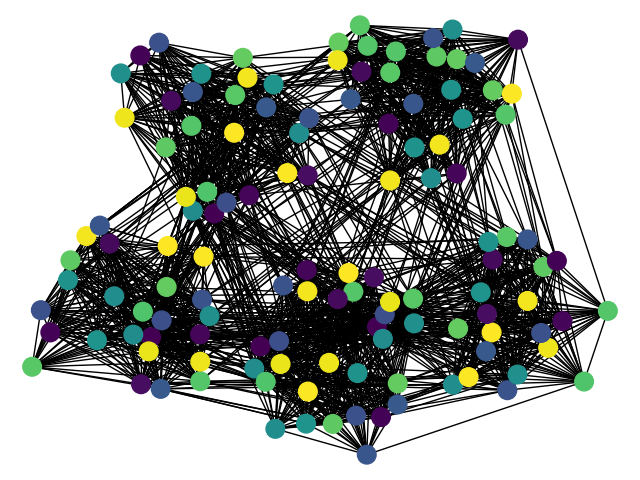

Após a execução do algorítmo temos o seguinte resultado, que é o mesmo resultado que é mandado para o arquivo de texto:
    
    Escola_C:
Quantidade de cores: 21

Vértices não coloridos: 0

Preferências atendidas sobre o total de preferências: 10/26

Tempo de execução do algoritmo 0.33segundos



### Arquivo do Excel:

No arquivo do excel foram gerados as seguintes planilhas:

#### Planilha com todos os resultados

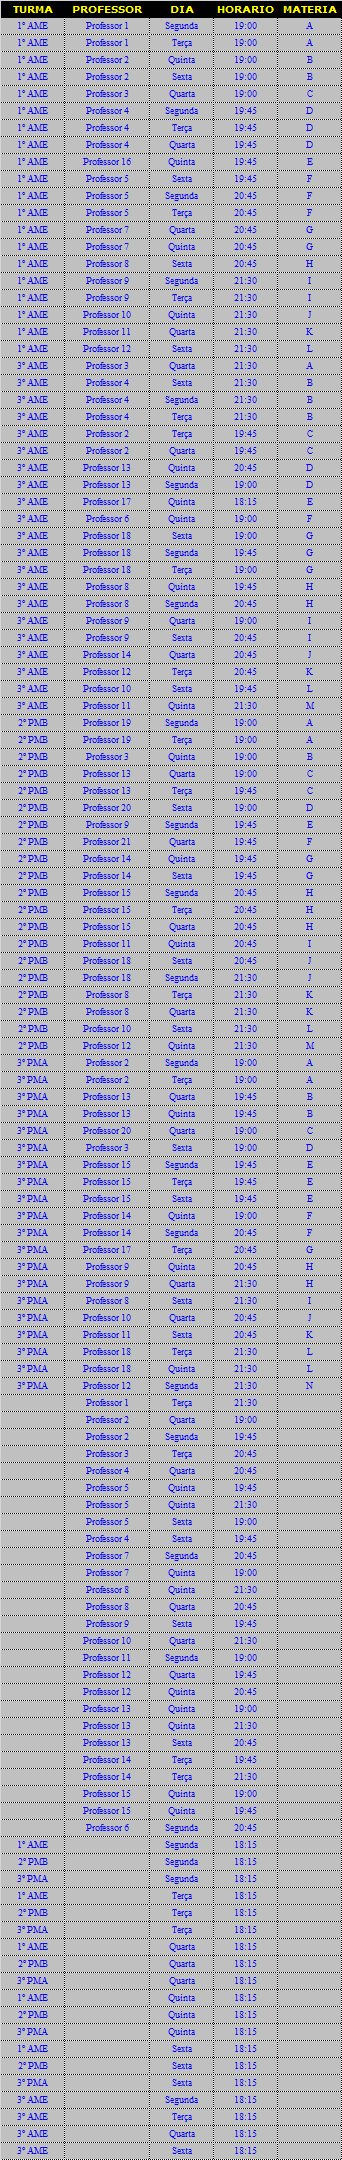

#### Planilha com os resultados para cada professor:

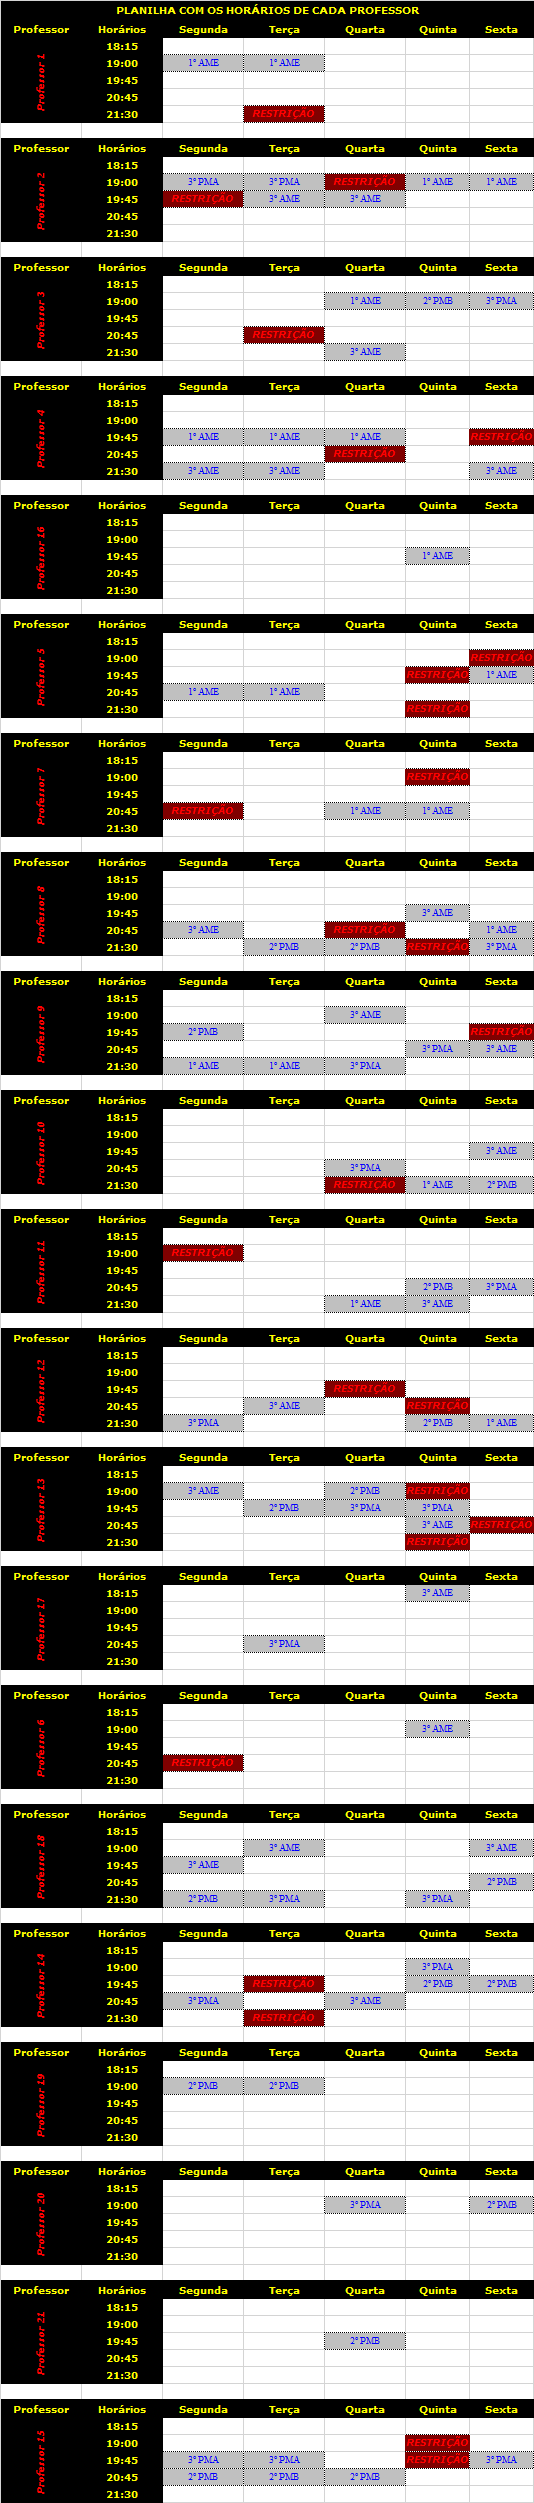

#### E por fim a planilha com os horários de cada turma:

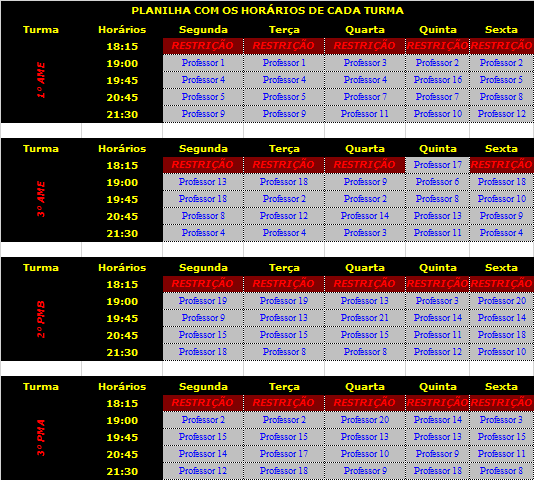


# Problemas e desafios:

Apesar do programa realizar todas as restrições e boa parte das preferências, e apresentar um bom resultado, muito próximo ao ótimo, ainda existem vértices que não foram pintados

Outro grande desafio é o tempo que o programa gasta pra executar, quando o grafo gerado possui muitas arestas, como por exemplo a "Escola_C". Este tempo é muito superior em relação a grafos de menor densidade.

Uma boa forma pra melhorar a questão do tempo, seria talvez, alguma outra heurística de busca local, pois a escolhida foi a b-strategia, e foi usado a condição de parar somente quando atinge o número de cores igual a quantidade de aulas da semana.